## Teen Market Segmentation Using K-means Clustering

understanding teenagers' online behavior is crucial for marketers aiming to engage with them effectively on social networking services (SNS). By analyzing their activities, preferences, and interactions, marketers can identify distinct segments within the teenage demographic and tailor their advertising strategies accordingly. This targeted approach not only increases the likelihood of capturing teenagers' attention but also enhances their overall experience on the platform by presenting content that resonates with their interests.

However, it's imperative for marketers to approach this practice ethically and responsibly. Respecting teenagers' privacy and preferences should be a top priority. This means being transparent about data collection practices, obtaining appropriate consent where necessary, and ensuring that the use of personal data complies with relevant regulations and guidelines.

Moreover, marketers should strive to strike a balance between targeting advertisements effectively and safeguarding teenagers from intrusive or manipulative advertising tactics. Building trust and credibility with teenage consumers requires maintaining integrity and authenticity in advertising practices.

Ultimately, by combining data-driven insights with ethical considerations, marketers can create more meaningful and respectful interactions with teenage consumers on social networking services, fostering positive relationships and driving sustainable business outcomes.







## Dataset information

The dataset represents a random sample of 30,000 U.S. high school students who had profiles on a well-known SNS in 2006. To protect the users’ anonymity, the SNS will remain unnamed. The data was sampled evenly across four high school graduation years (2006 through 2009) representing the senior, junior, sophomore, and freshman classes at the time of data collection

The dataset contatins 40 variables like: gender, age, friends, basketball, football, soccer, softball, volleyball,swimming, cute, sexy, kissed, sports, rock, god, church, bible, hair, mall, clothes, hollister, drugs etc whcih shows their interests. The final dataset indicates, for each person, how many times each word appeared in the person’s SNS profile

### impoting packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

import warnings
warnings.filterwarnings("ignore")

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


### loading dataset

In [4]:
Teen_market= pd.read_csv("D:/PROJECT/snsdata.csv")

In [5]:
pd.set_option("display.max_columns", None) #This will ensure that pandas displays all columns when you output a DataFrame.

In [6]:
# running head and tail command to see first 5 and last 5 observations
Teen_market.head()



,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [7]:
Teen_market.tail()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
29995,2009,M,16.115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29999,2009,F,18.724,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
Teen_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

### summary Statistical of numerical variable

In [9]:
Teen_market.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


### summary Statistical of categorical variable

In [10]:
Teen_market.describe(include = "object") 

,gender
count,27276
unique,2
top,F
freq,22054


### missing values

In [11]:
Teen_market.isnull()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
Teen_market.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

A total of 5,086 records have missing ages. Also concerning is the fact that the minimum and maximum values seem to be unreasonable; it is unlikely that a 3 year old or a 106 year old is attending high school.

### number of male and female candidates in  dataset¶

In [13]:
Teen_market["gender"].value_counts()  #This method can be applied to a pandas Series to get a count of unique values and their frequencies.

F    22054
M     5222
Name: gender, dtype: int64

### look number of Male Female and missing value

In [14]:
Teen_market["gender"].value_counts(dropna= False)# The dropna() method is used in pandas to remove missing (NaN) values from a DataFrame.

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

There are 22054 female, 5222 male teen students and 2724 missing values

### now fill all null values in gender columns

In [15]:
Teen_market["gender"].fillna("not disclosed", inplace= True)# fillna() is Fill all NaN values in the DataFrame with a specified value

In [16]:
Teen_market.isnull().sum()

gradyear           0
gender             0
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

age columns has 5086 missing values

### One way to deal with these missing values would be to fill the missing values with the average age of each graduation year  using mean

In [17]:
Teen_market.groupby("gradyear")["age"].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

avarage age differs by roughfly one year per change in graduation year

In [18]:
Teen_market.isnull().sum()

gradyear           0
gender             0
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

### We now fill the missing values for each graduation year with the mean that we got as above

In [19]:
Teen_market['age']=Teen_market.groupby("gradyear")["age"].transform(lambda x : x.fillna(x.mean()))

lambda function is also known as inline function 
because scope of this function is limited to this line only.

In [20]:
Teen_market["age"].isnull().sum()

0

In [21]:
Teen_market.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

now no missing values in dataset

### treatment of outliers 

The original age range contains value from 3 - 106, which is unrealistic because student at age of 3 or 106 would not attend high school. A reasonable age range for people attending high school will be the age range between 13 to 21. The rest should be treated as outliers keeping the age of student going to high school in mind.

###  detect outlier using box plot method 

C:\Users\Kunal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


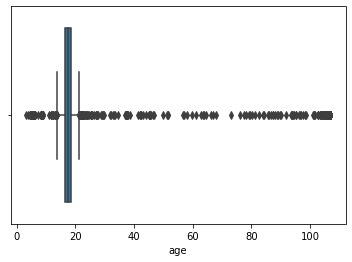

In [22]:
sns.boxplot(Teen_market["age"])
plt.show()

### handle outlier using IQR method

 IQR (Interquartile Range): 
 
 Calculate the IQR, which is the difference between the 75th and 25th percentiles (Q3 and Q1). Data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR may be considered outliers.

In [23]:
# Calculate Q1 and Q3
q1 = Teen_market["age"].quantile(0.25)
q3 = Teen_market["age"].quantile(0.75)

# Calculate IQR
iqr = q3 - q1
print(iqr)



1.887459224069687


In [24]:
# Filter outliers
df = Teen_market[(Teen_market["age"] > (q1 - 1.5 * iqr)) & (Teen_market["age"] < (q3 + 1.5 * iqr))]

In [25]:
df['age'].describe()

count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

From the above summary we can observe that after treating the outliers the mininmum age is 13.719000 and the maximum age is 21.158000

In [26]:
df.shape

(29633, 40)

C:\Users\Kunal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


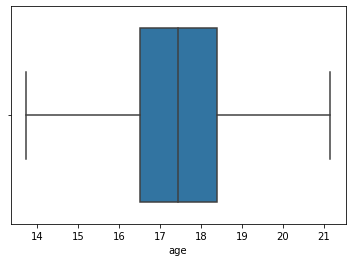

In [27]:
sns.boxplot(df["age"])
plt.show()

there is no outliers

### Data preprocessing

The process of z-score standardization, also known as z-score normalization, is a common technique used to rescale features in a dataset so that they have a mean of zero and a standard deviation of one. This transformation is useful for ensuring that all features contribute equally to an analysis, especially when using distance-based algorithms or comparing variables with different scales.

Here's a summary of the z-score standardization process:

Calculate Mean and Standard Deviation: For each feature (or column) in the dataset, calculate the mean and standard deviation.

Subtract Mean: Subtract the mean of each feature from every value in that feature's column. This centers the distribution of each feature around zero.

Divide by Standard Deviation: Divide the centered values by the standard deviation of the feature. This scales the values so that they have a standard deviation of one.

Mathematically, the z-score 

 

After z-score standardization, the interpretation of the data changes. Instead of representing the raw counts or values, each data point now represents the number of standard deviations it is away from the mean. A z-score of 0 indicates that the value is exactly at the mean, positive z-scores indicate values above the mean, and negative z-scores indicate values below the mean.

For example, if someone's z-score for mentioning "Swimming" is three, it means they mentioned "Swimming" three standard deviations more than the average teenager in the dataset. This provides a standardized measure of how much a value deviates from the average, allowing for easier comparison across different features.

Z-score standardization is a powerful preprocessing technique that helps to mitigate the impact of differing scales and ensures that all features contribute equally to an analysis, thereby improving the robustness and interpretability of the results.







In [28]:
categories=df.columns[4:40]

categories

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [29]:
scaled_feature=Teen_market.copy()

Using .copy() ensures that any modifications made to df_copy will not be reflected in the original DataFrame df. This is particularly useful when you want to experiment with data transformations or analysis without risking changes to your original dataset.

In [30]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
features=scaled_feature[categories]

In [32]:
features.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features=sc.fit_transform(features.values)

In [34]:
scaled_feature[categories]=features

In [35]:
scaled_feature.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2007.500000,17.982148,30.179467,2.704052e-14,-2.330839e-16,1.003252e-14,4.090942e-15,1.402178e-14,1.550438e-15,-1.042129e-16,-2.791499e-15,8.804790e-16,-3.902316e-15,8.368073e-15,7.804627e-16,5.210192e-15,-1.856775e-14,-4.411682e-15,-1.849220e-14,-3.621399e-16,-4.247832e-15,-2.998890e-15,3.552965e-15,1.801611e-15,1.967911e-15,1.902004e-15,3.451757e-16,1.532770e-15,9.749116e-15,-9.736022e-16,-2.112029e-14,-1.183242e-14,-1.432802e-14,-3.393087e-14,-1.677602e-14,-3.443779e-15,-3.203401e-16,1.261689e-15,-1.083258e-15
std,1.118053,7.169862,36.530877,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,2006.000000,3.086000,0.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,2006.750000,16.504000,3.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,2007.500000,17.443000,20.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,2008.250000,18.391459,44.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,2.093406e-01,-3.377929e-01,3.980781e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,8.931794e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
max,2009.000000,106.927000,830.0

### covert object variable to numeric 

In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'gender' feature
scaled_feature.gender= le.fit_transform(scaled_feature.gender.values)



In [41]:
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_encoded
0,2006,1,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,0.494457,-0.267795,-0.141421,-0.589161,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,1
1,2006,0,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,1.007842,2.438587,0.398078,-0.297557,-0.192654,-0.104247,5.079910,8.653277,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,0
2,2006,1,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,1.519887,-0.141421,0.209341,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908,1
3,2006,0,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,-0.589161,1.050397,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,0
4,2006,2,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,0.703703,-0.267323,-0.264225,9.614211,0.494457,0.626046,-0.141421,1.806344,-0.337793,0.398078,-0.297557,-0.192654,-0.104247,0.525925,-0.246906,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316,2


In [42]:
# Drop the 'gender_encoded' column
scaled_feature.drop(columns=['gender_encoded'], inplace=True)


### cheaking tranformed values

In [44]:
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,0.494457,-0.267795,-0.141421,-0.589161,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,0,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,1.007842,2.438587,0.398078,-0.297557,-0.192654,-0.104247,5.079910,8.653277,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,1,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,1.519887,-0.141421,0.209341,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,0,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,-0.589161,1.050397,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,2,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,0.703703,-0.267323,-0.264225,9.614211,0.494457,0.626046,-0.141421,1.806344,-0.337793,0.398078,-0.297557,-0.192654,-0.104247,0.525925,-0.246906,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


### Building the K-means model

In [46]:
from sklearn.cluster import KMeans

# Create a KMeans clustering object
kmeans = KMeans(n_clusters=5, random_state=0)


In [47]:
model = kmeans.fit(scaled_feature)


## Elbow curve for KMens clustering

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt




In [50]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)


We initialize an empty list wcss to store the within-cluster sum of squares (WCSS) for different numbers of clusters.
We loop over a range of numbers from 1 to 19 using range(1, 20), representing the potential number of clusters.
For each number of clusters i, we create a KMeans object kmeans with n_clusters=i, and other parameters such as init='k-means++' for smart initialization, max_iter=300 for the maximum number of iterations, and random_state=0 for reproducibility.
We fit the KMeans model to the scaled features scaled_feature.
We calculate the inertia_ attribute of the KMeans model, which represents the WCSS, and append it to the wcss list.

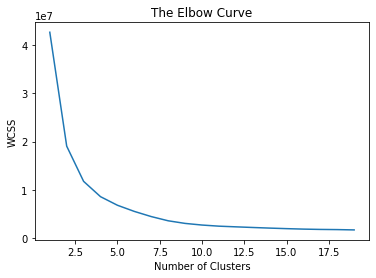

In [51]:
plt.plot(range(1, 20), wcss) 
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # WCSS stands for total within-cluster sum of square
plt.show()


Finally, we use matplotlib.pyplot.plot() to create a line plot, where the x-axis represents the number of clusters (range(1, 20)) and the y-axis represents the corresponding WCSS values stored in the wcss list.
We add a title to the plot using plt.title() to indicate that it's the Elbow Curve.
We label the x-axis with 'Number of Clusters' using plt.xlabel().
We label the y-axis with 'WCSS' (total within-cluster sum of squares) using plt.ylabel().
We display the plot using plt.show().
The resulting plot shows the Elbow Curve, allowing us to visually identify the optimal number of clusters based on the point where the curve starts to form an elbow, indicating a diminishing return in reducing WCSS with additional clusters.






### Fit K-Means clustering for k=5

In [52]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_feature)

KMeans(n_clusters=5)

In [53]:
kmeans.labels_

array([2, 2, 3, ..., 2, 2, 2])

In [54]:
len(kmeans.labels_)

30000

In [56]:
Teen_market['cluster'] = kmeans.labels_

In [57]:
Teen_market

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,2
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
29996,2009,M,15.792,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
29997,2009,M,15.784,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
29998,2009,M,16.378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


### Interpreting Clustering Results

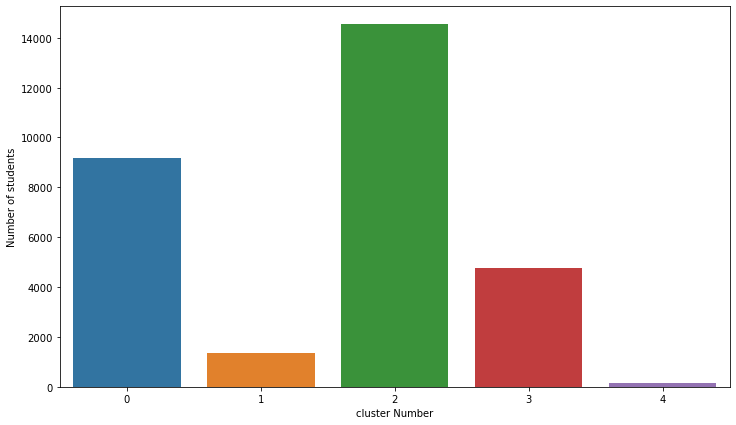

In [59]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1), y=Teen_market.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

From the above plot we can see that cluster 1 is the largest and cluster 3 has fewest teen students.

### number of students belonging to each cluster¶

In [61]:
size_array = list(Teen_market.groupby(['cluster']).count()['age'].values)
size_array

[9176, 1343, 14536, 4784, 161]

### check the cluster statistics

In [62]:
Teen_market.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.287816,0.266674,0.241173,0.166412,0.166957,0.149847,0.108217,0.109525,0.093723,0.153226,0.340562,0.224935,0.143091,0.131866,0.105166,0.460985,0.339255,0.045554,0.797188,0.258391,0.481909,0.262969,0.120205,0.023540,0.435266,0.117371,0.119551,0.263840,0.373474,0.155405,0.070619,0.048823,0.195292,0.125000,0.089799,0.056670
1,0.381236,0.295607,0.240506,0.257632,0.196575,0.146687,0.205510,0.134773,0.091586,0.140730,0.479523,0.223380,0.189873,0.205510,0.113179,0.569620,0.283693,0.040953,0.790767,0.256888,0.650782,0.397617,0.163812,0.031273,0.518243,0.154133,0.135517,0.422934,0.483991,0.169769,0.131050,0.090097,0.205510,0.134773,0.116902,0.047655
2,0.223308,0.229018,0.191387,0.121423,0.109177,0.115094,0.085718,0.091566,0.080627,0.127683,0.272565,0.206728,0.127408,0.108214,0.096313,0.362548,0.269813,0.035498,0.680930,0.221863,0.409741,0.200812,0.091428,0.018368,0.395707,0.095487,0.080696,0.218148,0.296574,0.135182,0.054554,0.039970,0.177353,0.101679,0.084067,0.064461
3,0.327968,0.283027,0.275920,0.243311,0.182901,0.156982,0.137542,0.127090,0.094064,0.151965,0.392768,0.183110,0.164089,0.149875,0.115385,0.504599,0.316054,0.045778,0.783445,0.277383,0.544732,0.321697,0.145694,0.023829,0.445443,0.131271,0.103261,0.315635,0.441054,0.168060,0.095945,0.075460,0.176003,0.124373,0.086747,0.059156
4,0.322981,0.260870,0.279503,0.211180,0.223602,0.223602,0.161491,0.142857,0.093168,0.130435,0.472050,0.229814,0.192547,0.136646,0.167702,0.472050,0.372671,0.062112,0.695652,0.198758,0.627329,0.248447,0.080745,0.006211,0.645963,0.180124,0.136646,0.316770,0.571429,0.198758,0.124224,0.149068,0.217391,0.161491,0.130435,0.055901


By analyzing these cluster center values, you can gain insights into the characteristics of each cluster and understand how different features contribute to the clustering process. This information can be valuable for segmenting the data and identifying meaningful patterns or groups within the dataset.

In [ ]:
                     THANK YOU